# Handling uncertainties in image processing

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tifffile as tiff
from lecture8_support import *

## Literature
Drosg, 2009, ["Dealing with uncertainties"](https://doi.org/0.1007/978-3-642-01384-3), Springer Verlag

M. Grabe, 2014,["Measurement Uncertainties in Science and Technology"](https://doi.org/10.1007/978-3-319-04888-8), Springer Verlag

## Why do we need to talk about the uncertain?
> “Scientific knowledge is a body of statements of varying degree of certainty  
> – some most unsure, some nearly sure, but none absolutely certain.”  
>As found in Feynman, RP (1997) Surely You Are Joking, Mr. Feynman, Norton, New York.

## Which uncertainties are we dealing with?

<div class="row">
<div class="column">

### Technical certainties
- Metric
- Noise
- Unsharpness
- Effects from image processing
- Numerical errors 
    
</div>
<div class="column">    

### Field specific uncertainties
- Model simplifications
- Variations in population

</div>
</div>   
    

## Counting or measuring

<div class="row">
<div class="column">
        
__Counting__  
    
<center><img src="figures/np_counting.png" style="height:150px"/></center>
    
    
 - Discrete countable items
 - Absolute values
    
 Uncertainties: from preparation  

 _Example:_ area of segmented region
        
</div>
<div class="column">
         
__Measuring__  
    
<center><img src="figures/np_measure.png" style="height:150px"/></center>      
    
 - Physical quantities
 - Values with uncertainties
   
 Uncertainties: Noise, instrumentation  
    
 _Example:_ water content from gray levels
</div>
</div>

## Categories of errors
### Systematic

### Random

### Target practicing

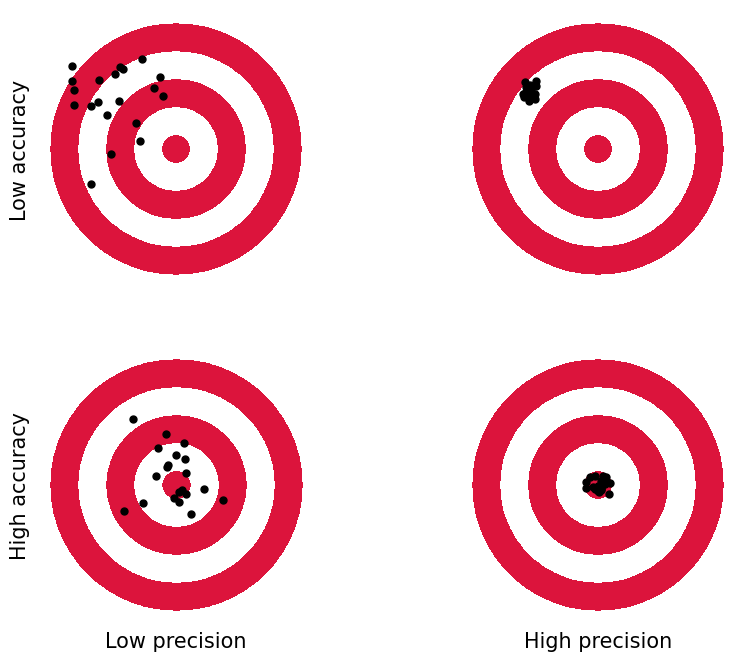

In [2]:
precacc(500)

### Target practicing in statistical terms

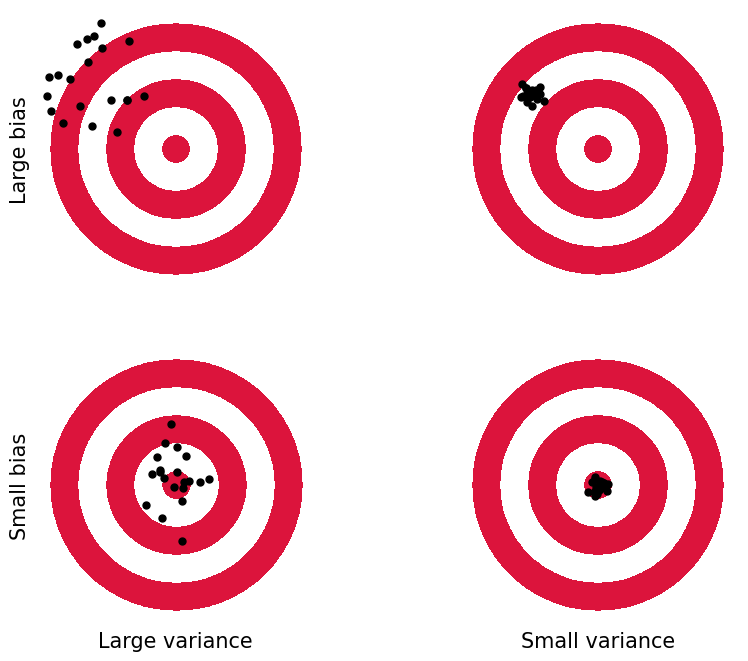

In [4]:
precacc(500,['Large bias','Small bias','Large variance','Small variance'])

## Absolute vs relative errors

## Error propagation

### Example measure the pixel size
To measure pixel size we need:
- An object with known length
- An image of the object

$$\mbox{pixel size}=\frac{\mbox{Object length}}{\mbox{Pixel distance between edges}}$$

#### Our measurements
    

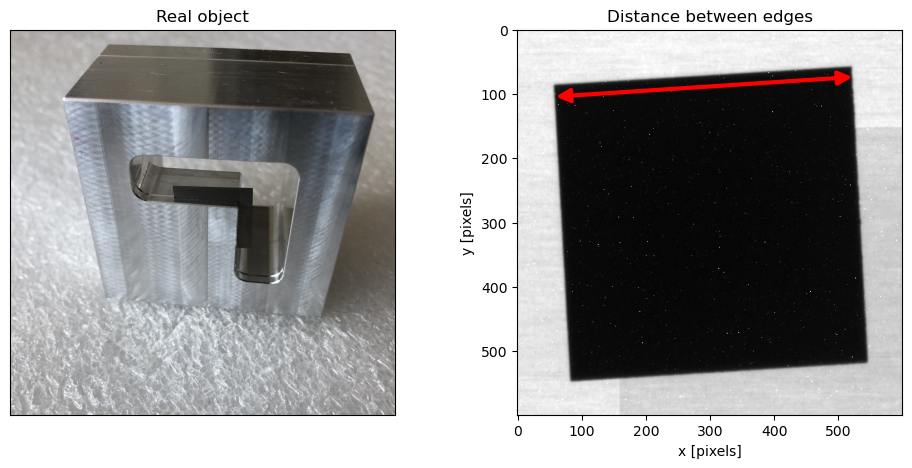

In [20]:
img1 = tiff.imread('data/edge20mm_0000.tif')
pic = plt.imread('figures/edge_object.jpg')
fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].imshow(pic)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Real object')

ax[1].imshow(img1,vmin=300,vmax=30000,cmap='gray');
ax[1].set_xlabel('x [pixels]')
ax[1].set_ylabel('y [pixels]');
arrow = patches.FancyArrowPatch((55,104), (526, 73),
                                 mutation_scale=20,
                                 #ec='blue',fc='cornflowerblue',
                                 color='red',
                                 arrowstyle='<|-|>',linewidth=3
                                )
ax[1].add_patch(arrow);
#ax.annotate(text='', xy=(54,104), xytext=(527,71), arrowprops=dict(arrowstyle='<->',color='yellow',lw=4))
d=np.sqrt((528-53)**2+(104-73)**2)
ax[1].set_title('Distance between edges');


| Quantity  | Measurement | Uncertainty   | Unit |
|:---|---:|---:|---|
| Caliper distance  | 20.0 | 0.05 | mm |
| Pixel distance    | 464.9  | 0.32  | pixels |


[The detailed analysis](https://colab.research.google.com/github/ImagingELearning/resolution/blob/main/tutorials/02_PixelSize/02_PixelSize.ipynb)

#### Pixel size with uncertainty
The error of $a/b$ is defined as
$$\frac{\sigma_{Pixelsize}}{Pixelsize}=\sqrt{\biggl({\frac{\sigma_{pixels}}{pixels} }\biggr)^2+ \biggl({\frac{\sigma_{length}}{length}}\biggr)^2}$$

[From this tutorial](https://www.webassign.net/question_assets/unccolphysmechl1/measurements/manual.html).

In [22]:
length       = 20.0 # mm
error_length = 0.05 # mm
pixels       = 464.9 # pixels
error_pixels = 0.32  # pixels

pixel_size = length/pixels

rel_uncertainty = np.sqrt((error_pixels/pixels)**2 + (error_length/length)**2)

print('Pixel size = {0:0.3f} mm/pixel +/- {1:0.4f} %'.format(pixel_size,rel_uncertainty*100))

Pixel size = 0.043 mm/pixel +/- 0.2593 %


## Consequences of pixel size uncertainties

- Distances
- Area and perimenter measurements


## Confidence map of a segmentation